<a href="https://colab.research.google.com/github/liao771018/tibame-ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlretrieve

url = 'https://github.com/liao771018/tibame-ML/raw/main/titanic/train.csv'
urlretrieve(url, 'train.csv')

url = 'https://github.com/liao771018/tibame-ML/raw/main/titanic/test.csv'
urlretrieve(url, 'test.csv')

('test.csv', <http.client.HTTPMessage at 0x7fdd2c867290>)

In [3]:
import pandas as pd

train_df = pd.read_csv('train.csv', encoding='utf-8')
predict_df = pd.read_csv('test.csv', encoding='utf-8')

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# concat 用法
# 把兩個 DataFrame 接在一起
df1 = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df2 = pd.DataFrame([
    [5, 6],
    [7, 8]
])
# axis=0 增加列(預設)
# axis=1 增加欄    忘記了就試試看印出來
# ignore_index 標籤會重新給
pd.concat([df1, df2], axis=1, ignore_index=True)


,0,1,2,3
0,1,2,5,6
1,3,4,7,8


In [6]:
# sum 的用法
# DataFrame 相同 index 的數值相加
df = pd.DataFrame([
    [1, 2],
    [3, 4]
])
# axis=0 相加列(預設)
# axis=1 相加欄    忘記了就試試看印出來
df.sum(axis=1)

0    3
1    7
dtype: int64

In [7]:
# pandas篩選: 篩選[針對每一筆給出True/False]
df = pd.DataFrame([
    [1, 2],
    [3, 4]
])

df[[False, True]]  # [3, 4]

# Series 篩選方式
s = pd.Series(["A", "B", "C"])
s[[True, True, False]]  # "A" "B"

0    A
1    B
dtype: object

In [8]:
# 把 train_df 和 predict_df 合併在一起做資料預處理
datas = pd.concat([train_df, predict_df], axis=0, ignore_index=True)
datas = datas.drop(['PassengerId', 'Survived'], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
# 資料預處裡
# setp1. 填補缺失值
# 1-1 check有多少個空值
s = datas.isna().sum()

# s[s!=0]: 篩選出非0值 (filter操作)
# ascending 是排序方式
s[ s!=0 ].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [10]:
# 1-2 check 每一個欄位是哪一種型態
# a. 數值: Age, SibSp, Parch, Ticket(#share), Fare
# b. 類別: Pclass, Name(mid), Sex, Cabin(first), Embarked

# 補空值(最可能出現的值)
# 類別: 最常出現的值
# 數值: 中位數最可能出現，而不是平均值


In [11]:
# 處裡 Cabin / Ticket / Name ，整理出要補空值的值

# 取出 Cabin 第一個字(座艙等級)
def cabinchange(c):
  if pd.isna(c):
    return None
  else:
    return c[0]

datas['Cabin'] = datas['Cabin'].apply(cabinchange)

In [12]:
# 每一個票券號碼出現幾次
counts = datas['Ticket'].value_counts()

def ticketchange(t):
  if pd.isna(t):
    return None
  else:
    return counts[t]

datas['Ticket'] = datas['Ticket'].apply(ticketchange)

In [13]:
# 取出 Name 的稱謂
# n = 'Braund, Mr. Owen Harris	' -> Mr

def namechange(n):
  return n.split(',')[-1].split('.')[0].strip()

datas['Name'] = datas['Name'].apply(namechange)

In [14]:
# 印出來看一下
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,None,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,NaN,0,0,1,8.0500,None,S


In [15]:
# 填缺失值 Embarked
# a. 數值: Age, SibSp, Parch, Ticket(#share), Fare
# b. 類別: Pclass, Name(mid), Sex, Cabin(first), Embarked

most = datas['Embarked'].value_counts().idxmax() # 最多的
datas['Embarked'] = datas['Embarked'].fillna(most)
# 補完後 check 一下


# Pclass是類別型態，要補最常出現的，但這裡因為是[1,2,3]會被判定為數值，所以要先 drop 再補值
# 一次填所有型態為數值的欄位: 填中位數
med = datas.median().drop(['Pclass'])
datas = datas.fillna(med)
# 補完後 check 一下

# 也可以準備一個字典放要補的值 
# fill = {"Embarked" : S, "Fare" : 8.23}
# datas.fillna(fill)

datas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,None,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,28.0,0,0,1,8.0500,None,S


In [16]:
# 再看一下空值欄位
s = datas.isna().sum()

# s[s!=0]: 篩選出非0值 (filter操作)
# ascending 是排序方式
s[ s!=0 ].sort_values(ascending=False)
# Cabin 缺太多，補最常出現的會出事，可以補"皆不是"

Cabin    1014
dtype: int64

In [17]:
# 2. One-Hot-Encoding
# One-Hot-Encoding 一定要做，但為了美觀，我們可以把過於稀少的去掉

# 對 Name 做整理，留下數量較多的，其餘改成 None
count = datas['Name'].value_counts()
reserved = count[count>50].index

def namefilter(mid):
  if mid in reserved:
    return mid
  else:
    return None

datas['Name'] = datas['Name'].apply(namefilter)  

In [18]:
# Pclass很特別: 雖然他是類別，但他的類別是有大小關係，不做也可以
# 做不做各有各的好處，可以試試看
# 性別可以不做，因為只有兩個值

# 可以顯示的欄位數
pd.set_option('display.max_columns', 30)

# 把類別欄位展開
# Name(mid), Sex, Cabin(first), Embarked
datas = pd.get_dummies(datas)

# Pclass 被判定為數值欄位
# 可做可不做，老師試過可以做
datas = pd.get_dummies(datas, columns=['Pclass'])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [19]:
# 增加欄位時，先想過這個欄位有沒有意義
datas['family'] = datas['SibSp'] + datas['Parch']
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [20]:
# 取出列的方法

df = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
], index=["a", "b", "c"])
# .iloc: 依據你的第幾列 -> [1st, 2nd, 3rd]
df.iloc[[0, 2]]
# .loc: 依據你的列標籤
df.loc[["a", "c"]]

,0,1
a,1,2
c,5,6


In [21]:
# 切開回復成 train 及 test 轉 np
import numpy as np

x = np.array(datas.iloc[:len(train_df)])
y = train_df["Survived"]

x_predict = np.array(datas.iloc[len(train_df):])

[Text(0.5, 0.875, 'Name_Mr <= 0.5\ngini = 0.477\nsamples = 554\nvalue = [542, 349]'),
 Text(0.25, 0.625, 'Ticket <= 4.5\ngini = 0.396\nsamples = 228\nvalue = [100, 268]'),
 Text(0.125, 0.375, 'Fare <= 15.373\ngini = 0.314\nsamples = 195\nvalue = [62, 256]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'family <= 3.5\ngini = 0.365\nsamples = 33\nvalue = [38, 12]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pclass_1 <= 0.5\ngini = 0.262\nsamples = 326\nvalue = [442, 81]'),
 Text(0.625, 0.375, 'Ticket <= 7.5\ngini = 0.226\nsamples = 263\nvalue = [362, 54]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Embarked_C <= 0.5\ngini = 0.377\nsamples = 63\nvalue = [80, 27]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

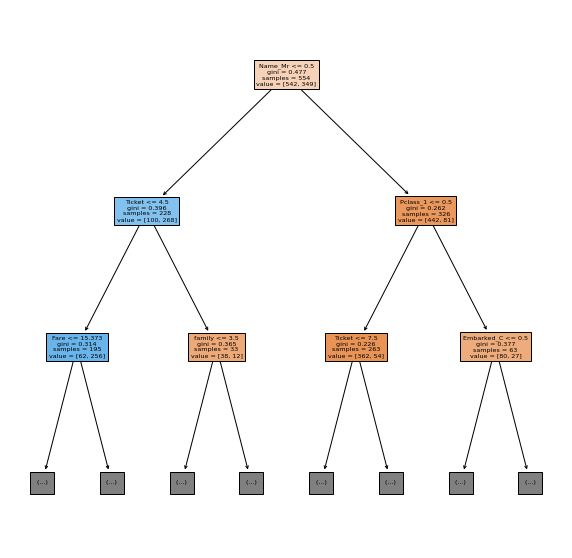

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# n_jobs是核心數， n_jobs=-1 表示用電腦本身的
clf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)
clf.fit(x, y)

# 你可以挑選十顆裡面的某科把它畫出來, 看一下什麼叫做略有不同
plt.figure(figsize=(10, 10))
plot_tree(clf.estimators_[3], feature_names=datas.columns, filled=True, max_depth=2)

In [23]:
# 用 cross_validation 切分 90% 10%
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100, max_depth=5)

# cv 是指要切成幾份，通常 10， n_jobs 使用電腦的CPU
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)

print(scores)
print(np.average(scores))

[0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.79775281 0.86516854 0.84269663]
0.8327715355805243


In [75]:
# 自動去跑迴圈,交叉驗證
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

# 設定樹木數量的範圍、最大層數
params = {
    "n_estimators":range(11, 150, 2),
    "max_depth":[5, 6, 7, 8, 9, 10]
}

cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x, y)


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'n_estimators': range(11, 150, 2)})

In [77]:
# 列出交叉驗證最好的參數
cv.best_params_

# 得到參數後，回頭測試調整，看一下結果

{'max_depth': 7, 'n_estimators': 141}

In [92]:
# 整理答案後上傳
clf = RandomForestClassifier(n_estimators=141, max_depth=7)
clf.fit(x, y)

pre = clf.predict(x_predict)

# 把乘客號碼加回來
df = pd.DataFrame({
    "PassengerId": predict_df["PassengerId"],
    "Survived":pre
})

df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
# 換一種演算法再試一次

# 這裡也算是預處裡的一環
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)

# 已經是np array, 所以不是用.iloc(pandas)
x_scale = datas_scale[:len(train_df)]
x_predict_scale = datas_scale[len(train_df):]


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()

# 設定數量的範圍
params = {
    "n_neighbors":range(5, 50)
}

cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_scale, y)

print(cv.best_params_)
print(cv.best_score_)


{'n_neighbors': 7}
0.832796504369538


In [40]:
# KNN 跑出來最好的是 7 ，剩下就慢慢試試改變會不會比較好
# 老師試過 7-11 
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)

pre = clf.predict(x_predict_scale)

# 把乘客號碼加回來
df = pd.DataFrame({
    "PassengerId": predict_df["PassengerId"],
    "Survived":pre
})

df.to_csv("knn.csv", encoding="utf-8", index=False)
df


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
